In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [2]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime.drop(["Unnamed: 0"],axis=1,inplace=True)

In [6]:
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [7]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime_norm=StandardScaler().fit_transform(crime)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [8]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [9]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [10]:
# Adding clusters to dataset
crime['clusters']=dbscan.labels_
crime

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


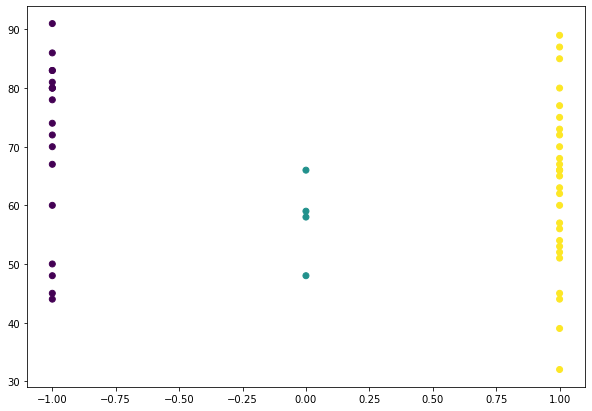

In [12]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clusters'],crime['UrbanPop'], c=dbscan.labels_) 

In [20]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [23]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,0:])
df_norm

,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,0.5
1,0.554217,0.746575,0.271186,0.961240,0.0
2,0.439759,0.852740,0.813559,0.612403,0.0
3,0.481928,0.496575,0.305085,0.315245,0.0
4,0.493976,0.791096,1.000000,0.860465,0.0
5,0.427711,0.544521,0.779661,0.811370,0.0
6,0.150602,0.222603,0.762712,0.098191,1.0
7,0.307229,0.660959,0.677966,0.219638,0.0
8,0.879518,0.993151,0.813559,0.635659,0.0
9,1.000000,0.568493,0.474576,0.478036,0.0


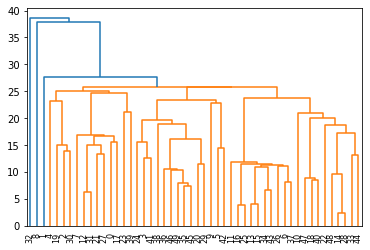

In [15]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime, method='single'))

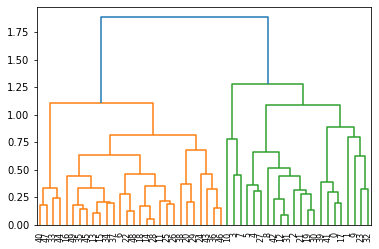

In [24]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))


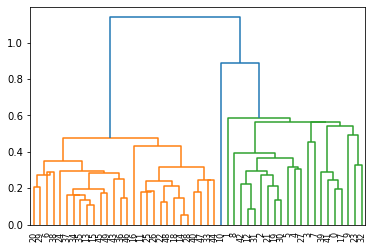

In [25]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

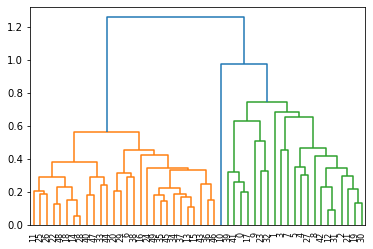

In [26]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [30]:
# create Hierarchical Clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [31]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [32]:
y_hc

array([1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [33]:
Clusters

,Clusters
0,1
1,0
2,0
3,0
4,0
5,0
6,2
7,0
8,0
9,0


In [35]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,0:])


df_norm.head(10)  # Top 10 rows


,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,0.5
1,0.554217,0.746575,0.271186,0.961240,0.0
2,0.439759,0.852740,0.813559,0.612403,0.0
3,0.481928,0.496575,0.305085,0.315245,0.0
4,0.493976,0.791096,1.000000,0.860465,0.0
5,0.427711,0.544521,0.779661,0.811370,0.0
6,0.150602,0.222603,0.762712,0.098191,1.0
7,0.307229,0.660959,0.677966,0.219638,0.0
8,0.879518,0.993151,0.813559,0.635659,0.0
9,1.000000,0.568493,0.474576,0.478036,0.0


In [38]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 

C:\Users\kp305\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 2, 2, 0, 2, 2, 1, 4, 2, 0, 4, 3, 4, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       3, 0, 1, 3, 1, 2, 3, 1, 2, 4, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 4, 1,
       3, 1, 1, 3, 3, 1])

In [40]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
crime['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()


,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,0.5
1,0.554217,0.746575,0.271186,0.961240,0.0
2,0.439759,0.852740,0.813559,0.612403,0.0
3,0.481928,0.496575,0.305085,0.315245,0.0
4,0.493976,0.791096,1.000000,0.860465,0.0


In [42]:
crime.iloc[:,0:6].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clusters,clust
clust,,,,,,
0,13.937500,243.625000,53.750000,21.412500,-0.5,0
1,6.017647,136.882353,71.235294,19.147059,1.0,1
2,10.822222,273.777778,74.333333,36.411111,-1.0,2
3,2.981818,73.636364,51.181818,11.409091,1.0,3
4,9.080000,197.600000,80.800000,22.320000,-1.0,4


In [43]:
crime.head()

,Murder,Assault,UrbanPop,Rape,clusters,clust
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,-1,2
2,8.1,294,80,31.0,-1,2
3,8.8,190,50,19.5,-1,0
4,9.0,276,91,40.6,-1,2
